In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alexandrepetit881234_egyptian_hieroglyphs_path = kagglehub.dataset_download('alexandrepetit881234/egyptian-hieroglyphs')

print('Data source import complete.')


100%|██████████| 10.4M/10.4M [00:01<00:00, 6.99MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):

        print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input


In [3]:
import kagglehub

path = kagglehub.dataset_download("alexandrepetit881234/egyptian-hieroglyphs")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/egyptian-hieroglyphs


In [4]:
import os
import cv2
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("done")

done


In [5]:
dataset_path="/kaggle/input/egyptian-hieroglyphs/"
train_path=dataset_path+"train"
train_csv=pd.read_csv(dataset_path+"train/_annotations.csv")
valid_path=dataset_path+"valid"
valid_csv=pd.read_csv(dataset_path+"valid/_annotations.csv")
test_path=dataset_path+"test"
test_csv=pd.read_csv(dataset_path+"test/_annotations.csv")

In [6]:
def load_bbox_from_csv(csv_path):
    """
    Load bounding box data from CSV file

    Parameters:
    csv_path (str): Path to the CSV file

    Returns:
    pd.DataFrame: DataFrame containing image names and bounding box coordinates
    """
    try:
        df = pd.read_csv(csv_path)
        # Print the columns to help with debugging
        print("CSV columns:", df.columns.tolist())
        return df
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
        return None

def crop_images_with_bbox(image_dir, csv_path, output_dir):
    """
    Crop images based on bounding box coordinates from CSV.

    Parameters:
    image_dir (str): Directory containing the original images
    csv_path (str): Path to CSV file containing bounding box coordinates
    output_dir (str): Directory to save cropped images
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Load CSV data
    bbox_data = load_bbox_from_csv(csv_path)
    if bbox_data is None:
        return

    # Print first few rows to verify data
    print("\nFirst few rows of the CSV data:")
    print(bbox_data.head())

    # Process each row in the CSV
    for idx, row in bbox_data.iterrows():
        try:
            # Get image name and bbox coordinates using the correct column names
            image_name = row['filename']  # Changed from 'image_name'
            x_min = row['xmin']      # Changed from 'x_min'
            y_min = row['ymin']      # Changed from 'y_min'
            x_max = row['xmax']      # Changed from 'x_max'
            y_max = row['ymax']      # Changed from 'y_max'

            # Construct full image path
            image_path = os.path.join(image_dir, image_name)

            # Check if image exists
            if not os.path.exists(image_path):
                print(f"Warning: Image {image_name} not found in {image_dir}")
                continue

            # Read image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Could not read image {image_name}")
                continue

            # Ensure coordinates are integers
            x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

            # Crop image
            cropped_image = image[y_min:y_max, x_min:x_max]

            # Save cropped image
            output_path = os.path.join(output_dir, f'{image_name}')
            cv2.imwrite(output_path, cropped_image)

        except Exception as e:
            print(f"Error processing row {idx}: {str(e)}")
            print(f"Row data: {row}")  # Added to help debug any issues
            continue

    print("Cropping completed!")

def process_dataset(image_dir, csv_path,folder):
    """
    Process the dataset images

    Parameters:
    image_dir (str): Directory containing images
    csv_path (str): Path to CSV file with bounding box coordinates
    """
    # Use /kaggle/working instead of the input directory

    output_dir = '/kaggle/working/cropped/'
    folders={
        0:"train",
        1:"valid",
        2:"test"
    }

    output_dir=output_dir+folders[folder]

    crop_images_with_bbox(image_dir, csv_path, output_dir)

# Example usage
if __name__ == "__main__":
    # For training set
    train_image_dir = train_path
    train_csv_path = train_path+'/_annotations.csv'
    process_dataset(train_image_dir, train_csv_path,0)

    # For validation set
    val_image_dir = valid_path
    val_csv_path = valid_path+'/_annotations.csv'
    process_dataset(val_image_dir, val_csv_path,1)

    # For testing set
    test_image_dir = test_path
    test_csv_path =test_path+'/_annotations.csv'
    process_dataset(test_image_dir, test_csv_path,2)

CSV columns: ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

First few rows of the CSV data:
                                            filename  width  height  \
0  nile-fish-7-_jpg.rf.31e4278980878c47a1e6a2f8dd...    640     640   
1  Her-8-_jpg.rf.32bcf63f4ae4d6aea53cea5b9c0059b4...    640     640   
2  composite_bow-34-_jpg.rf.33153e63f7158777c50d4...    640     640   
3  snake-6-_jpg.rf.32ac52ece4bcc06b1ead936693df17...    640     640   
4  king-26-_jpg.rf.329a5a8e366f4fe2e3a3dca88524cc...    640     640   

           class  xmin  ymin  xmax  ymax  
0      Nile_Fish   375   319   512   454  
1            Her   211   247   368   339  
2  Composite_Bow   158   183   336   282  
3          Snake   181   351   318   506  
4           King   218   290   339   524  
Cropping completed!
CSV columns: ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

First few rows of the CSV data:
                                            filename  wid

In [7]:
BATCH_SIZE=16
HEIGHT, WIDTH = 240,240

In [8]:
train_dir="/kaggle/working/cropped/train"
test_dir="/kaggle/working/cropped/test"
valid_dir="/kaggle/working/cropped/valid"

In [9]:
from sklearn.model_selection import train_test_split

# Split train and validation
train_df, valid_df = train_test_split(
    train_csv,
    test_size=0.2,
    stratify=train_csv['class'],  # This ensures balanced split
    random_state=42
)

Found 2178 validated image filenames belonging to 95 classes.


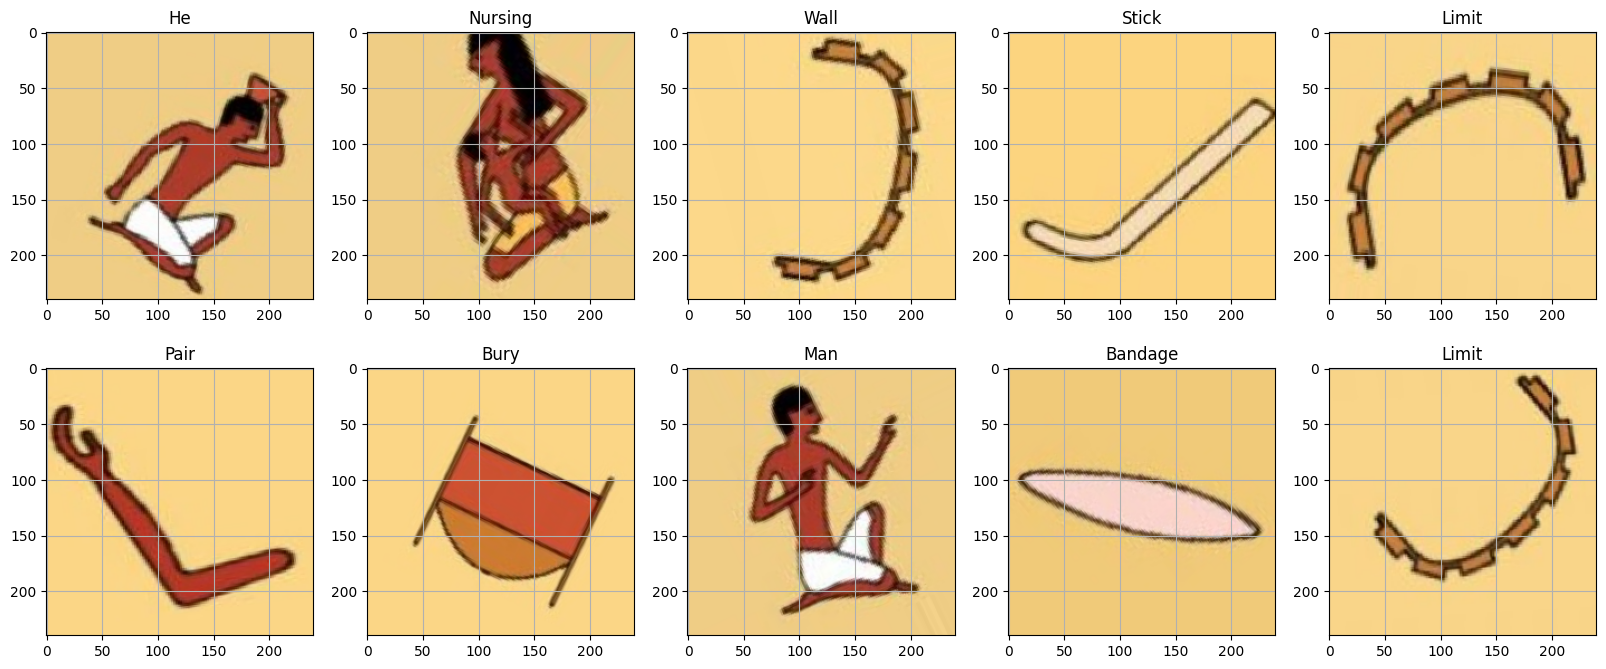

In [10]:
train_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    ).flow_from_dataframe(
                                      dataframe=train_df,
                                      directory= train_dir,
                                      x_col="filename",
                                      y_col="class",
                                      class_mode="categorical",
                                      shuffle=True,
                                      color_mode='rgb',
                                      batch_size=BATCH_SIZE,
                                      target_size=(WIDTH,HEIGHT),
                                      seed=0,
                          )
classes_train=list(train_gen.class_indices.keys())
plt.figure(figsize=(20,8))
for X_batch, y_batch in train_gen:
    for i in range(0,10):
        plt.subplot(2,5,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes_train[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break

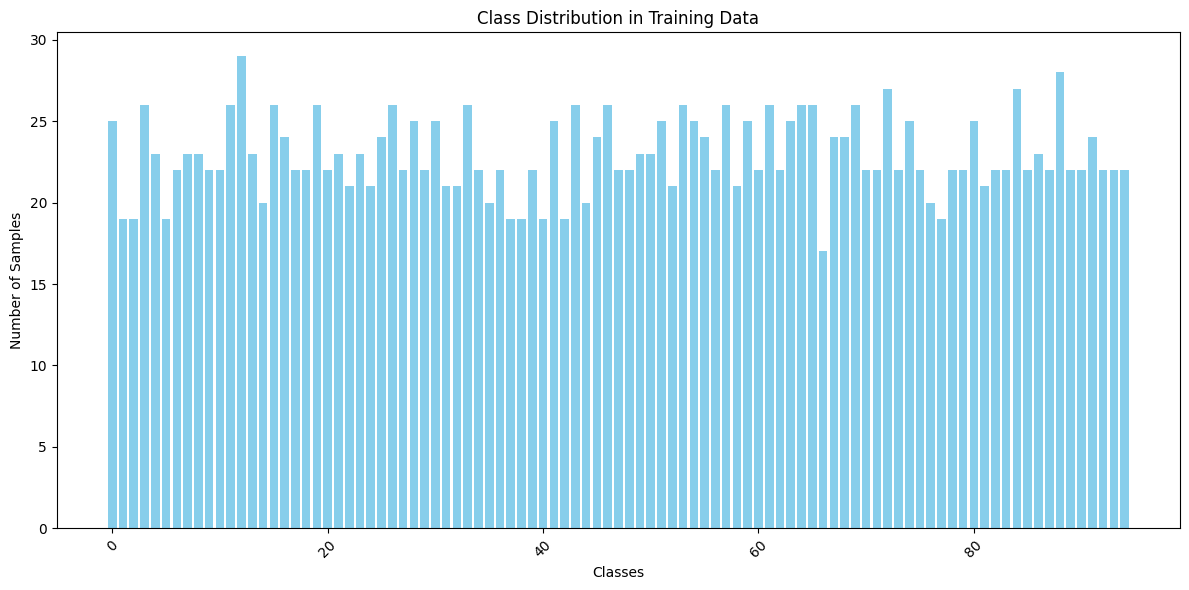

In [11]:
from collections import Counter

# Assuming you have train_gen set up using ImageDataGenerator
# This will give you a list of class indices from the training generator
class_indices = train_gen.classes  # Get class labels

# Count the occurrences of each class
class_counts = Counter(class_indices)

# Get class names and counts
class_names = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title('Class Distribution in Training Data')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Found 545 validated image filenames belonging to 95 classes.


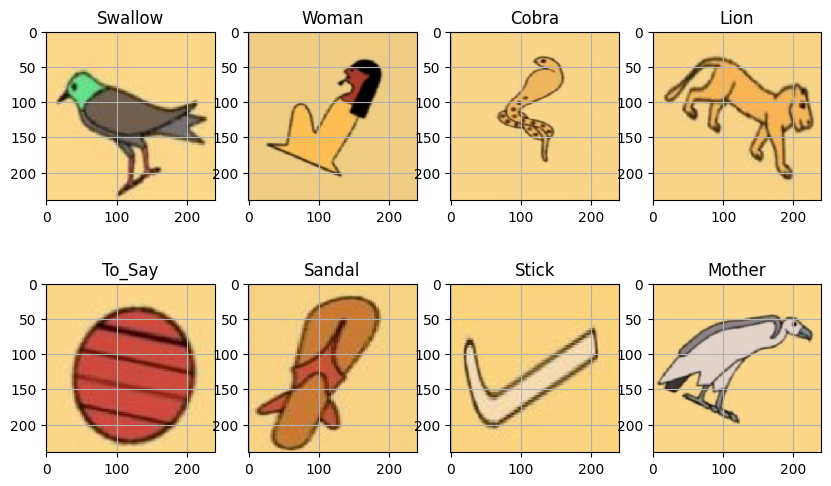

In [12]:
valid_gen=ImageDataGenerator(
    rescale=1./255,
    ).flow_from_dataframe(
                            dataframe=valid_df,
                            directory=train_dir,
                            x_col="filename",
                            y_col="class",
                            class_mode="categorical",
                            shuffle=False,
                            color_mode='rgb',
                            batch_size=BATCH_SIZE,
                            target_size=(WIDTH, HEIGHT),
                            seed=0
                          )
classes_valid=list(valid_gen.class_indices.keys())
plt.figure(figsize=(10,6))
for X_batch, y_batch in valid_gen:
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes_valid[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break

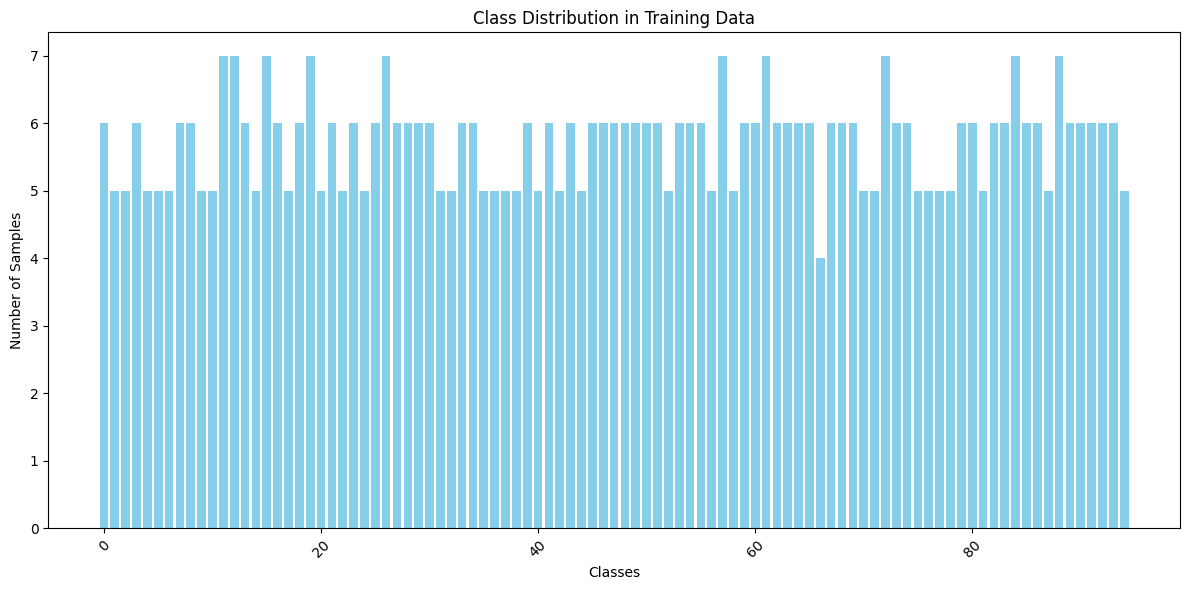

In [13]:
from collections import Counter

# Assuming you have train_gen set up using ImageDataGenerator
# This will give you a list of class indices from the training generator
class_indices = valid_gen.classes  # Get class labels

# Count the occurrences of each class
class_counts = Counter(class_indices)

# Get class names and counts
class_names = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title('Class Distribution in Training Data')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
test_gen=ImageDataGenerator(
    rescale=1./255
    ).flow_from_dataframe(
                                      dataframe=valid_csv,
                                      directory= valid_dir,
                                      x_col="filename",
                                      y_col="class",
                                      class_mode="categorical",
                                      shuffle=True,
                                      color_mode='rgb',
                                      batch_size=BATCH_SIZE,
                                      target_size=(WIDTH,HEIGHT)
                          )
classes_test=list(test_gen.class_indices.keys())
plt.figure(figsize=(10,6))
for X_batch, y_batch in test_gen:
    for i in range(10,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes_test[np.where(y_batch[55]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break

Found 778 validated image filenames belonging to 95 classes.


<Figure size 1000x600 with 0 Axes>

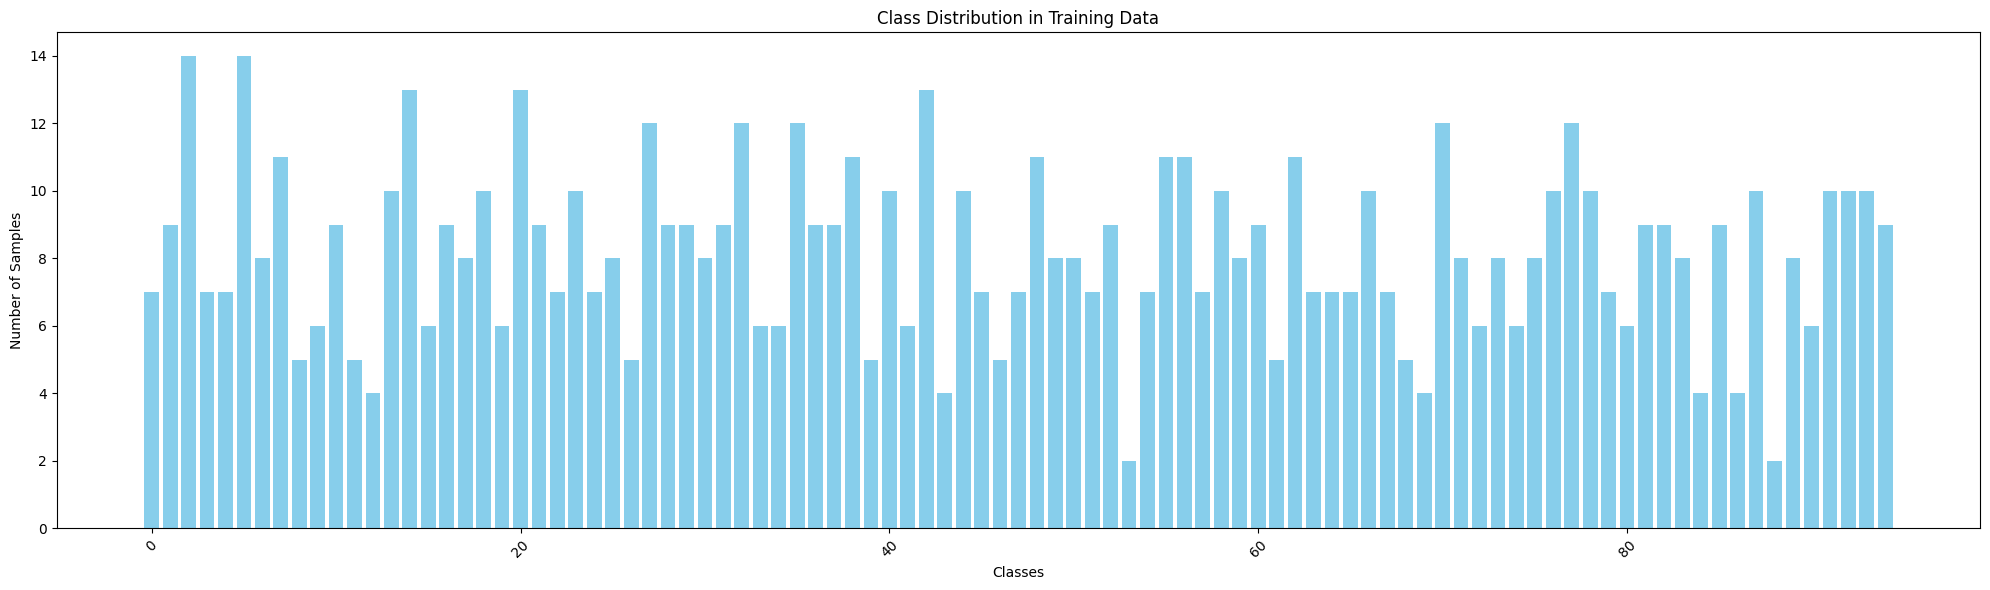

In [15]:
from collections import Counter

# Assuming you have train_gen set up using ImageDataGenerator
# This will give you a list of class indices from the training generator
class_indices = test_gen.classes  # Get class labels

# Count the occurrences of each class
class_counts = Counter(class_indices)

# Get class names and counts
class_names = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title('Class Distribution in Training Data')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
model_path="/kaggle/working/models/"

In [17]:
from sklearn.metrics import precision_score, recall_score
def Evaluate_model_2(model, train_generator, valid_generator, test_generator):

        model_evaluate_train = model.evaluate(train_generator)
        print("Training Loss : ",model_evaluate_train[0])
        print("Training Accuracy : ",model_evaluate_train[1])
        print("Training Precision : ", model_evaluate_train[2])
        print("Training Recall :", model_evaluate_train[3])

        model_evaluate_valid = model.evaluate(valid_generator)
        print("Validation Loss : ",model_evaluate_valid[0])
        print("Validation Accuracy : ",model_evaluate_valid[1])
        print("Validation Precision : ", model_evaluate_valid[2])
        print("Validation Recall :",model_evaluate_valid[3])

        model_evaluate_test = model.evaluate(test_generator)
        print("Tesing Loss : ",model_evaluate_test[0])
        print("Tesing Accuracy : ",model_evaluate_test[1])
        print("Tesing Precision : ",model_evaluate_test[2])
        print("Tesing Recall :",model_evaluate_test[3])

        return np.round(model_evaluate_train[0],2),np.round(model_evaluate_test[0],2),\
               np.round(model_evaluate_train[1],2),np.round(model_evaluate_test[1],2),\
               np.round(model_evaluate_train[2],2),np.round(model_evaluate_test[2],2),\
               np.round(model_evaluate_train[3],2),np.round(model_evaluate_test[3],2)

# **VGG16 Model**

In [18]:
learn_rate=keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=3,
    factor=0.1,
    min_lr=1e-5
)
early_stop=keras.callbacks.EarlyStopping(
    patience=10,
    monitor="val_loss",
    restore_best_weights=True,
    verbose=1
)
checkpoint=keras.callbacks.ModelCheckpoint(
    filepath=model_path+"model_cp.keras",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten,GlobalAveragePooling2D,GlobalMaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Model

base = VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, 3))
base.trainable = False
for layer in base.layers:
    layer.trainable = False

x = base.output


x = GlobalMaxPooling2D()(x)

output = Dense(95, activation='softmax')(x)

model_vgg = Model(inputs=base.input, outputs=output)

model_vgg.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy','Precision',"Recall"])

history_vgg=model_vgg.fit(train_gen,epochs=50,validation_data=valid_gen,
                                    callbacks=[
                                        learn_rate,
#                                         early_stop,
                                        checkpoint
                                              ]
                                   )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0184 - loss: 5.1029
Epoch 1: val_loss improved from inf to 4.43787, saving model to /kaggle/working/models/model_cp.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 313ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0184 - loss: 5.1013 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0239 - val_loss: 4.4379 - learning_rate: 1.0000e-04
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0385 - loss: 4.2710
Epoch 2: val_loss improved from 4.43787 to 3.99324, saving model to /kaggle/working/models/model_cp.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 276ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0387 - loss: 4.2704 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0899 - val_loss: 3.9932 - learning_rate: 1.0000e-04
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━

# **VGG16 Evaluation**

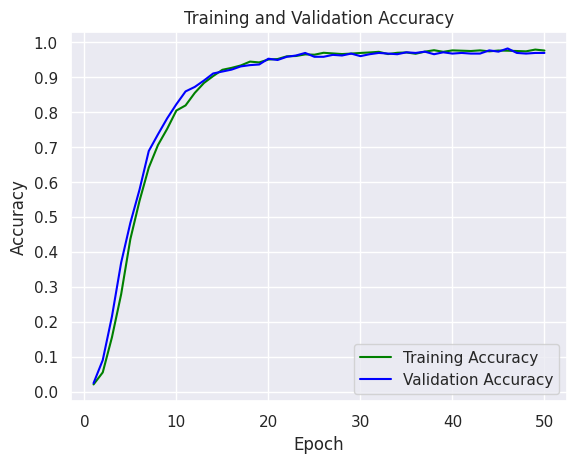

49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - Precision: 0.9746 - Recall: 0.9303 - accuracy: 0.9598 - loss: 0.2316
Test Accuracy: 0.9588689208030701
Test Loss: 0.236415833234787


In [21]:
sns.set()
acc_vgg = history_vgg.history['accuracy']
val_acc_vgg = history_vgg.history['val_accuracy']
loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']
epochs_vgg= range(1, len(loss_vgg) + 1)
plt.plot(epochs_vgg, acc_vgg, color='green', label='Training Accuracy')
plt.plot(epochs_vgg, val_acc_vgg, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

y_ticks = [i * 0.1 for i in range(11)]  # Y-axis ticks from 0.0 to 1.0 with a step of 0.1
plt.yticks(y_ticks)

plt.legend()
plt.show()

# Evaluate the model on test data
results_test= model_vgg.evaluate(test_gen, steps=len(test_gen), verbose=1)
# results_test
test_loss_vgg, test_accuracy_vgg =results_test[0],results_test[1]
print(f'Test Accuracy: {test_accuracy_vgg}')
print(f'Test Loss: {test_loss_vgg}')

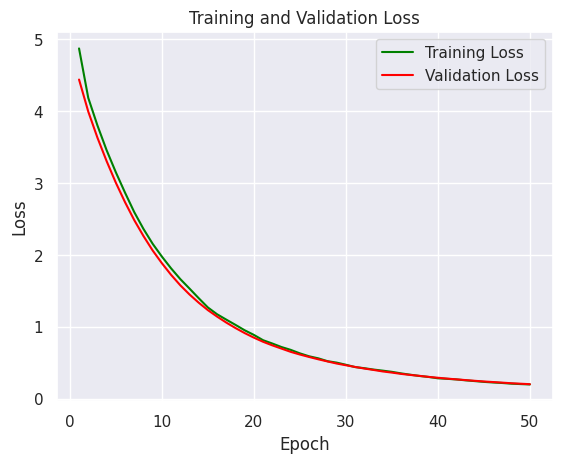

In [22]:
plt.figure()
plt.plot(epochs_vgg, loss_vgg, color='green', label='Training Loss')
plt.plot(epochs_vgg, val_loss_vgg, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

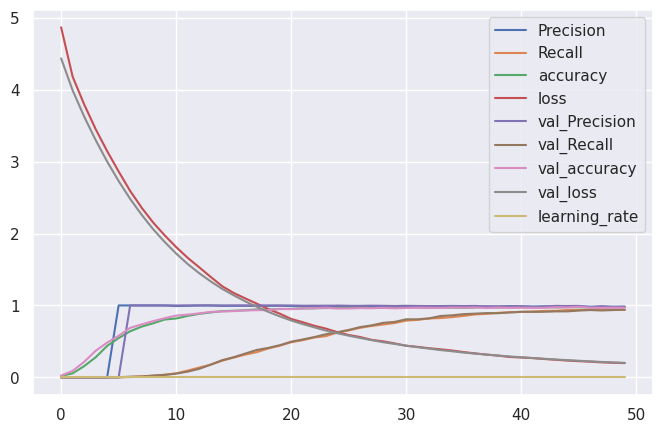

In [23]:
pd.DataFrame(history_vgg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [24]:
results_train= model_vgg.evaluate(train_gen, steps=len(train_gen), verbose=1)
# results_valid
train_loss_vgg, train_accuracy_vgg =results_train[0],results_train[1]
print(f'Training Accuracy: {train_accuracy_vgg}')
print(f'Training Loss: {train_loss_vgg}')

137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 267ms/step - Precision: 0.9820 - Recall: 0.9489 - accuracy: 0.9738 - loss: 0.1853
Training Accuracy: 0.9770431518554688
Training Loss: 0.18608462810516357


In [25]:
# Evaluate the model on valid data
results_valid= model_vgg.evaluate(valid_gen, steps=len(valid_gen), verbose=1)
# results_valid
valid_loss_vgg, valid_accuracy_vgg =results_valid[0],results_valid[1]
print(f'Validation Accuracy: {valid_accuracy_vgg}')
print(f'Validation Loss: {valid_loss_vgg}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - Precision: 0.9704 - Recall: 0.9234 - accuracy: 0.9517 - loss: 0.2135
Validation Accuracy: 0.9688073396682739
Validation Loss: 0.20081491768360138


In [26]:
# Evaluate the model on test data
results_test= model_vgg.evaluate(test_gen, steps=len(test_gen), verbose=1)
# results_test
test_loss_vgg, test_accuracy_vgg =results_test[0],results_test[1]
print(f'Test Accuracy: {test_accuracy_vgg}')
print(f'Test Loss: {test_loss_vgg}')

49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - Precision: 0.9675 - Recall: 0.9203 - accuracy: 0.9464 - loss: 0.2524
Test Accuracy: 0.9588689208030701
Test Loss: 0.23641589283943176


In [27]:
Evaluate_model_2(model_vgg, train_gen, valid_gen, test_gen)

137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - Precision: 0.9902 - Recall: 0.9512 - accuracy: 0.9811 - loss: 0.1856
Training Loss :  0.1915561556816101
Training Accuracy :  0.9756657481193542
Training Precision :  0.983832597732544
Training Recall : 0.949954092502594
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - Precision: 0.9704 - Recall: 0.9234 - accuracy: 0.9517 - loss: 0.2135
Validation Loss :  0.20081491768360138
Validation Accuracy :  0.9688073396682739
Validation Precision :  0.980879545211792
Validation Recall : 0.9412844181060791
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - Precision: 0.9657 - Recall: 0.9124 - accuracy: 0.9439 - loss: 0.2646
Tesing Loss :  0.23641590774059296
Tesing Accuracy :  0.9588689208030701
Tesing Precision :  0.9743935465812683
Tesing Recall : 0.929305911064148


(np.float64(0.19),
 np.float64(0.24),
 np.float64(0.98),
 np.float64(0.96),
 np.float64(0.98),
 np.float64(0.97),
 np.float64(0.95),
 np.float64(0.93))

In [28]:
Final_Report=[]
Final_Report.append(Evaluate_model_2(model_vgg, train_gen, valid_gen, test_gen))
Final_Report

137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 251ms/step - Precision: 0.9860 - Recall: 0.9501 - accuracy: 0.9805 - loss: 0.1871
Training Loss :  0.18900644779205322
Training Accuracy :  0.9797979593276978
Training Precision :  0.9866856932640076
Training Recall : 0.952708899974823
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - Precision: 0.9704 - Recall: 0.9234 - accuracy: 0.9517 - loss: 0.2135
Validation Loss :  0.20081491768360138
Validation Accuracy :  0.9688073396682739
Validation Precision :  0.980879545211792
Validation Recall : 0.9412844181060791
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - Precision: 0.9689 - Recall: 0.9285 - accuracy: 0.9552 - loss: 0.2375
Tesing Loss :  0.23641589283943176
Tesing Accuracy :  0.9588689208030701
Tesing Precision :  0.9743935465812683
Tesing Recall : 0.929305911064148


[(np.float64(0.19),
  np.float64(0.24),
  np.float64(0.98),
  np.float64(0.96),
  np.float64(0.99),
  np.float64(0.97),
  np.float64(0.95),
  np.float64(0.93))]

In [29]:
models_list=[
#              "CNN",
#              "DenseNet",
             "VGG16",
#              "EfficientNetB0"
            ]

Models_Scores=pd.DataFrame(Final_Report,index=models_list,columns=["Train Loss","Test Loss",
                                                                   "Train Accuracy","Test Accuracy",
                                                                   "Train Precision","Test Precision",
                                                                   "Train Recall","Test Recall"])
Models_Scores

,Train Loss,Test Loss,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall
VGG16,0.19,0.24,0.98,0.96,0.99,0.97,0.95,0.93


In [30]:
Models_Scores.to_csv(model_path+"ModelsScoresVGG16v.csv")

In [32]:
# model=keras.models.load_model(model_path+'model_cp.keras')
# model.save(model_path+'model_vgg16_1.h5')

# **CNN Model**

In [33]:
model_cnn = keras.models.Sequential()

model_cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=keras.layers.ReLU(), input_shape=(224, 224, 3)))
model_cnn.add(keras.layers.BatchNormalization())

model_cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPool2D(pool_size=2))

model_cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPool2D(pool_size=2))

model_cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPool2D(pool_size=2))


model_cnn.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPool2D(pool_size=2))

model_cnn.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPool2D(pool_size=4))


model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(256, activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.Dropout(0.1))
model_cnn.add(keras.layers.Dense(128, activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.Dropout(0.1))
model_cnn.add(keras.layers.Dense(128, activation=keras.layers.ReLU()))
model_cnn.add(keras.layers.Dense(95, activation="softmax", name="Output"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             

 Total params: 692,895 (2.64 MB)

 Trainable params: 691,871 (2.64 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [35]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy",'Precision',"Recall"])
history_cnn = model_cnn.fit(train_gen,epochs= 80,
                    validation_data = valid_gen,
                    callbacks = [
#                         early_stop,
                        learn_rate,
                        checkpoint
                                ]
                    )

Epoch 1/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0189 - loss: 4.7400
Epoch 1: val_loss did not improve from 0.20081
137/137 ━━━━━━━━━━━━━━━━━━━━ 64s 328ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0190 - loss: 4.7388 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0128 - val_loss: 4.5742 - learning_rate: 1.0000e-04
Epoch 2/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - Precision: 0.4368 - Recall: 7.5487e-04 - accuracy: 0.0658 - loss: 4.2224
Epoch 2: val_loss did not improve from 0.20081
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - Precision: 0.4392 - Recall: 7.7269e-04 - accuracy: 0.0660 - loss: 4.2211 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0220 - val_loss: 4.6536 - learning_rate: 1.0000e-04
Epoch 3/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - Precision: 0.7876 - Recall: 0.0212 - accuracy: 0.2270 - loss: 3.3778
Epoch 3: val_loss did not impro

# **CNN Evaluation**

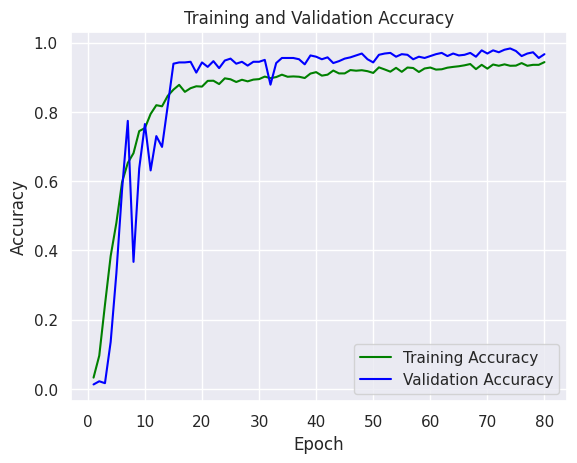

In [36]:
sns.set()
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

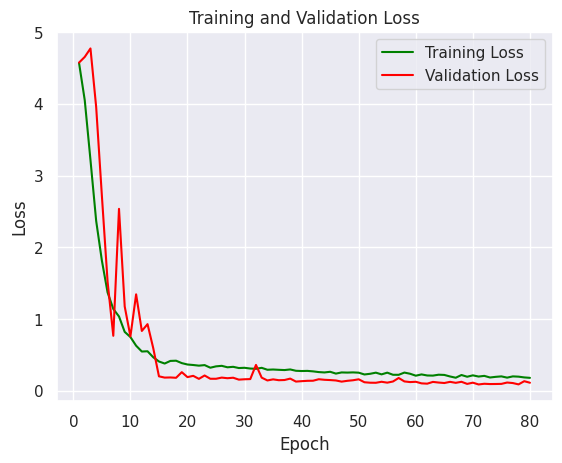

In [37]:
plt.figure()
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

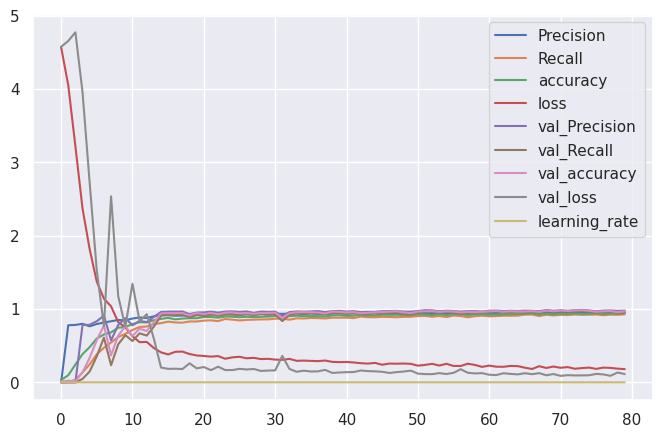

In [38]:
pd.DataFrame(history_cnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [39]:
results_train_cnn= model_cnn.evaluate(train_gen, steps=len(train_gen), verbose=1)
# results_valid
train_loss_cnn, train_accuracy_cnn =results_train_cnn[0],results_train_cnn[1]
print(f'Training Accuracy: {train_accuracy_cnn}')
print(f'Training Loss: {train_loss_cnn}')

137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 223ms/step - Precision: 0.9771 - Recall: 0.9647 - accuracy: 0.9706 - loss: 0.1000
Training Accuracy: 0.9706152677536011
Training Loss: 0.09267410635948181


In [40]:
# Evaluate the model on valid data
results_valid_cnn= model_cnn.evaluate(valid_gen, steps=len(valid_gen), verbose=1)
# results_valid
valid_loss_cnn, valid_accuracy_cnn =results_valid_cnn[0],results_valid_cnn[1]
print(f'Validation Accuracy: {valid_accuracy_cnn}')
print(f'Validation Loss: {valid_loss_cnn}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - Precision: 0.9774 - Recall: 0.9611 - accuracy: 0.9689 - loss: 0.0979
Validation Accuracy: 0.9669724702835083
Validation Loss: 0.11176416277885437


In [41]:
# Evaluate the model on test data
results_test_cnn= model_cnn.evaluate(test_gen, steps=len(test_gen), verbose=1)
# results_test
test_loss_cnn, test_accuracy_cnn =results_test_cnn[0],results_test_cnn[1]
print(f'Test Accuracy: {test_accuracy_cnn}')
print(f'Test Loss: {test_loss_cnn}')

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - Precision: 0.9823 - Recall: 0.9697 - accuracy: 0.9783 - loss: 0.0806
Test Accuracy: 0.9717223644256592
Test Loss: 0.09998379647731781


In [42]:
Evaluate_model_2(model_cnn, train_gen, valid_gen, test_gen)

137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 221ms/step - Precision: 0.9779 - Recall: 0.9606 - accuracy: 0.9710 - loss: 0.0905
Training Loss :  0.08893083781003952
Training Accuracy :  0.9724518060684204
Training Precision :  0.9776432514190674
Training Recall : 0.9637281894683838
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - Precision: 0.9774 - Recall: 0.9611 - accuracy: 0.9689 - loss: 0.0979
Validation Loss :  0.11176416277885437
Validation Accuracy :  0.9669724702835083
Validation Precision :  0.9774436354637146
Validation Recall : 0.9541284441947937
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - Precision: 0.9720 - Recall: 0.9552 - accuracy: 0.9677 - loss: 0.1196
Tesing Loss :  0.099983811378479
Tesing Accuracy :  0.9717223644256592
Tesing Precision :  0.9777777791023254
Tesing Recall : 0.9614396095275879


(np.float64(0.09),
 np.float64(0.1),
 np.float64(0.97),
 np.float64(0.97),
 np.float64(0.98),
 np.float64(0.98),
 np.float64(0.96),
 np.float64(0.96))

In [43]:
Final_Report.append(Evaluate_model_2(model_cnn, train_gen, valid_gen, test_gen))

137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 224ms/step - Precision: 0.9805 - Recall: 0.9653 - accuracy: 0.9734 - loss: 0.0933
Training Loss :  0.08812249451875687
Training Accuracy :  0.9752066135406494
Training Precision :  0.9809213876724243
Training Recall : 0.9678604006767273
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - Precision: 0.9774 - Recall: 0.9611 - accuracy: 0.9689 - loss: 0.0979
Validation Loss :  0.11176416277885437
Validation Accuracy :  0.9669724702835083
Validation Precision :  0.9774436354637146
Validation Recall : 0.9541284441947937
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - Precision: 0.9806 - Recall: 0.9682 - accuracy: 0.9755 - loss: 0.0923
Tesing Loss :  0.09998378157615662
Tesing Accuracy :  0.9717223644256592
Tesing Precision :  0.9777777791023254
Tesing Recall : 0.9614396095275879


In [44]:
models_list=[
#              "DenseNet",
             "VGG16",
             "CNN",
#              "EfficientNetB0"
            ]

Models_Scores=pd.DataFrame(Final_Report,index=models_list,columns=["Train Loss","Test Loss",
                                                                   "Train Accuracy","Test Accuracy",
                                                                   "Train Precision","Test Precision",
                                                                   "Train Recall","Test Recall"])
Models_Scores

,Train Loss,Test Loss,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall
VGG16,0.19,0.24,0.98,0.96,0.99,0.97,0.95,0.93
CNN,0.09,0.10,0.98,0.97,0.98,0.98,0.97,0.96


In [45]:
Models_Scores.to_csv(model_path+"ModelsScoresVGG16v_CNNv.csv")

In [46]:
model=keras.models.load_model(model_path+'model_cp.keras',custom_objects={'ReLU': keras.layers.ReLU})
model.save(model_path+'model_cnn_1.h5')

# **Predictions**

In [47]:
def predict_single_image_from_csv(model, data_csv, image_index, class_names,data_dir):

    # Get the image path for the specified index
    img_path = data_csv.iloc[image_index]['filename']  # Adjust 'image_path' to your column name

    # Read and preprocess the image
    img = cv2.imread(data_dir+"/"+img_path)
    img = cv2.resize(img, (HEIGHT, WIDTH))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img).astype("float32") / 255.0  # Normalize the image

    # Make a prediction
    prediction = np.argmax(model.predict(img.reshape(1, HEIGHT, WIDTH, 3), verbose=1), axis=-1)[0]

    # Get the actual label from the DataFrame
    actual = data_csv.iloc[image_index]['class']  # Adjust 'label' to your column name

    # Display the image and prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"Actual: {actual}\nPredicted: {class_names[prediction]}")
    plt.axis('off')  # Optional: turn off axes
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


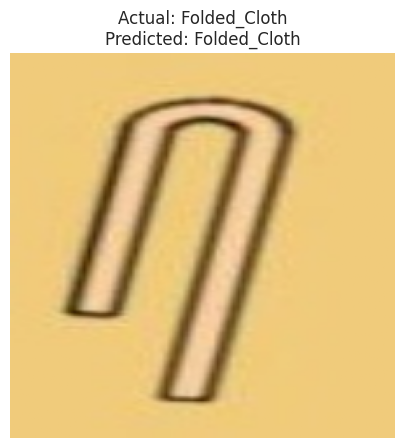

In [49]:
image_index = 240
predict_single_image_from_csv(model_cnn, test_csv, image_index,classes_train,test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


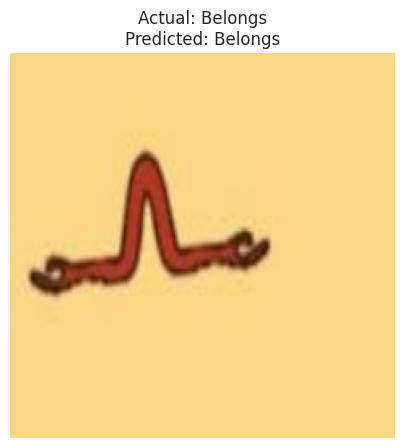

In [50]:
image_index = 242
predict_single_image_from_csv(model_cnn, test_csv, image_index,classes_train,test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


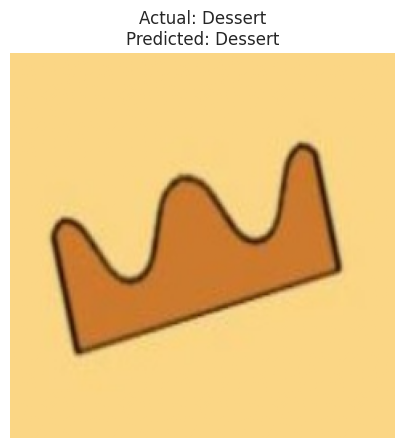

In [51]:
image_index = 244
predict_single_image_from_csv(model_cnn, test_csv, image_index,classes_train,test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


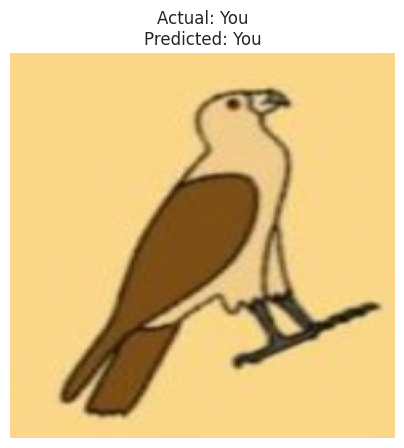

In [52]:
image_index = 246
predict_single_image_from_csv(model_cnn, test_csv, image_index,classes_train,test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


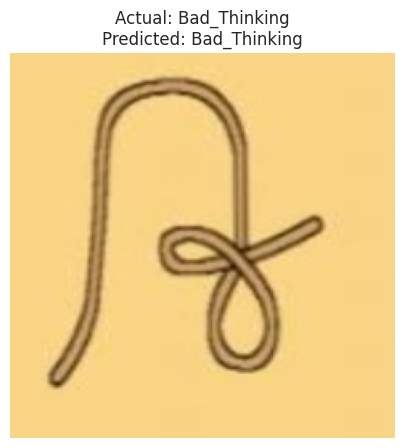

In [53]:
image_index = 248
predict_single_image_from_csv(model_cnn, test_csv, image_index,classes_train,test_dir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


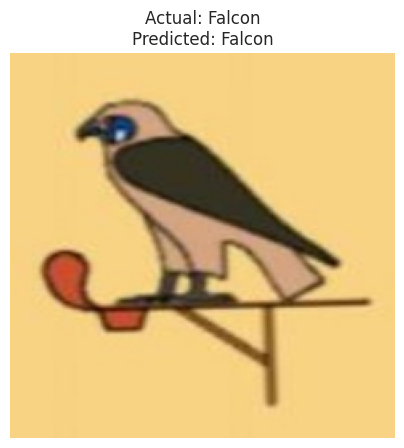

In [54]:
image_index = 250
predict_single_image_from_csv(model_cnn, test_csv, image_index,classes_train,test_dir)

In [55]:
!zip -r kaggle.zip /kaggle


Streaming output truncated to the last 5000 lines.
  adding: kaggle/input/egyptian-hieroglyphs/train/bread-10-_jpg.rf.20c23d7b3d26a1763728dfac0aba538c.jpg (deflated 76%)
  adding: kaggle/input/egyptian-hieroglyphs/train/composite_bow-41-_jpg.rf.7742fe33ffe22497e5bccb3f2f0eceab.jpg (deflated 78%)
  adding: kaggle/input/egyptian-hieroglyphs/train/enclosed-mound-2-_jpg.rf.20aee8e3d8339cbf3a9a7bc407d42571.jpg (deflated 72%)
  adding: kaggle/input/egyptian-hieroglyphs/train/cooked-39-_jpg.rf.6a7bec1e4f31bb754c467a19e1b10493.jpg (deflated 77%)
  adding: kaggle/input/egyptian-hieroglyphs/train/bandage-37-_jpg.rf.c00b1ddb1c52f65623d46e01406bb4df.jpg (deflated 72%)
  adding: kaggle/input/egyptian-hieroglyphs/train/stick-18-_jpg.rf.4b05bf58ae479e6976b297c7523c2da8.jpg (deflated 81%)
  adding: kaggle/input/egyptian-hieroglyphs/train/angry-14-_jpg.rf.03a4c98141e1e7b593bfa9f33563822c.jpg (deflated 68%)
  adding: kaggle/input/egyptian-hieroglyphs/train/belongs-2-_jpg.rf.56212d4946e18d579708db8eb2c1e

In [56]:
from google.colab import files
files.download("kaggle.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>